In [ ]:

import os
import cv2

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from tqdm import tqdm

import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
from google.colab import drive

gdrive = '/content/drive'
drive.mount(gdrive, force_remount=False)

gdisk = os.path.join(gdrive, 'MyDrive')

filename = 'Copy of smallpreprocessed (1)'

archive_path = os.path.join(gdisk, filename)
with zipfile.ZipFile('//content/drive/MyDrive/Copy of smallpreprocessed.zip', 'r') as zip_ref:
 zip_ref.extractall(f'{filename}_extracted')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
preprocessing_function=tf.keras.applications.vgg19.preprocess_input


In [ ]:


dataset_dir = '/content/Copy of smallpreprocessed (1)_extracted/data/SmallPreprocessed'
image_size = (299, 299)
batch_size = 32


datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = datagen.flow_from_directory(
    os.path.join(dataset_dir, 'val'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 12000 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models, Input

image_size = (299, 299)

xception_model = Xception(input_shape=(image_size[0], image_size[1], 3),include_top=False,weights='imagenet',pooling='avg')

inputs = Input(shape=(image_size[0], image_size[1], 3))
x = xception_model(inputs, training=False)
x = layers.BatchNormalization()(x)
x = layers.Dense(2048, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()






Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,180,588 (103.69 MB)

 Trainable params: 27,115,820 (103.44 MB)

 Non-trainable params: 64,768 (253.00 KB)

In [ ]:

xception_model.trainable = False

#  unfreeze the last 50 layers
for layer in base_model.layers[-50:]:
    layer.trainable = True



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)]



In [ ]:
hist = model.fit(train_generator,validation_data=val_generator,epochs=20,callbacks=callbacks)



Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 209s 494ms/step - accuracy: 0.6014 - loss: 1.0979 - val_accuracy: 0.6765 - val_loss: 0.8025 - learning_rate: 0.0010
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 184s 476ms/step - accuracy: 0.8283 - loss: 0.4375 - val_accuracy: 0.8705 - val_loss: 0.3653 - learning_rate: 0.0010
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 178s 474ms/step - accuracy: 0.9076 - loss: 0.2479 - val_accuracy: 0.8955 - val_loss: 0.3038 - learning_rate: 0.0010
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 178s 475ms/step - accuracy: 0.9362 - loss: 0.1842 - val_accuracy: 0.8190 - val_loss: 0.6089 - learning_rate: 0.0010
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 178s 476ms/step - accuracy: 0.9534 - loss: 0.1353 - val_accuracy: 0.9430 - val_loss: 0.1485 - learning_rate: 0.0010
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 178s 475ms/step - accuracy: 0.9604 - loss: 0.1129 - val_accuracy: 0.9520 - val_loss: 0.1372 - learning_rate: 0.0010
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 183s 488ms/step - accura

In [ ]:
model.save('../models/template_model.keras')
model.export('../models/template_model')

In [ ]:
score, acc= model.evaluate(test_generator)
print('Val Loss =', score)
print('Val Accuracy =', acc)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.9941 - loss: 0.0153
Val Loss = 0.030712567269802094
Val Accuracy = 0.9860000014305115


In [ ]:

test_loss, test_acc = model.evaluate(test_generator)
print(f" Final Test Accuracy: {test_acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step - accuracy: 0.9954 - loss: 0.0142
 Final Test Accuracy: 0.9875


In [ ]:
hist_=pd.DataFrame(hist.history)

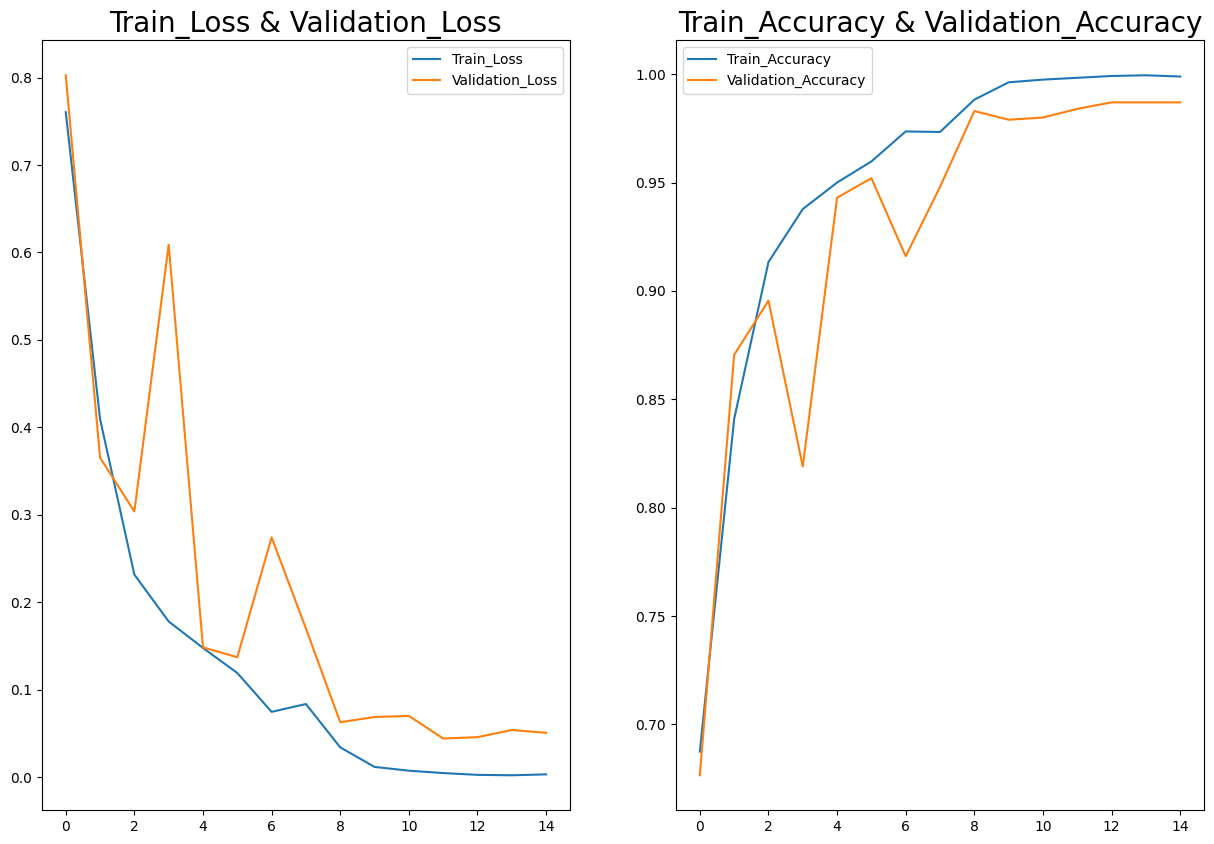

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

In [ ]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions,axis=1)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step


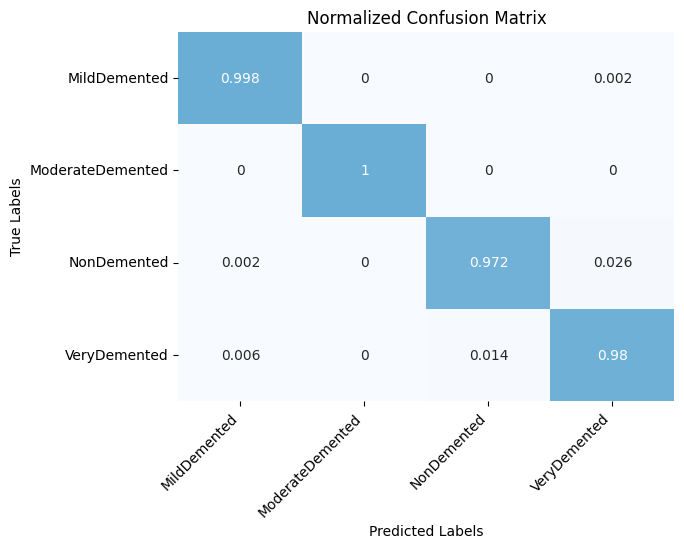

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


CM = confusion_matrix(y_test, y_pred)


CM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
class_names = ['MildDemented','ModerateDemented', 'NonDemented', 'VeryDemented']

sns.heatmap(CM_percent, fmt='g', center=True, cbar=False, annot=True,
            cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
class_names = ['MildDemented','ModerateDemented', 'NonDemented', 'VeryDemented']
ClassificationReport = classification_report(y_test, y_pred, target_names=class_names)
print('Classification Report is:\n', ClassificationReport)


Classification Report is:
                   precision    recall  f1-score   support

    MildDemented       0.99      1.00      1.00       500
ModerateDemented       1.00      1.00      1.00       500
     NonDemented       0.99      0.97      0.98       500
    VeryDemented       0.97      0.98      0.98       500

        accuracy                           0.99      2000
       macro avg       0.99      0.99      0.99      2000
    weighted avg       0.99      0.99      0.99      2000



/bin/bash: line 1: gitpush: command not found
